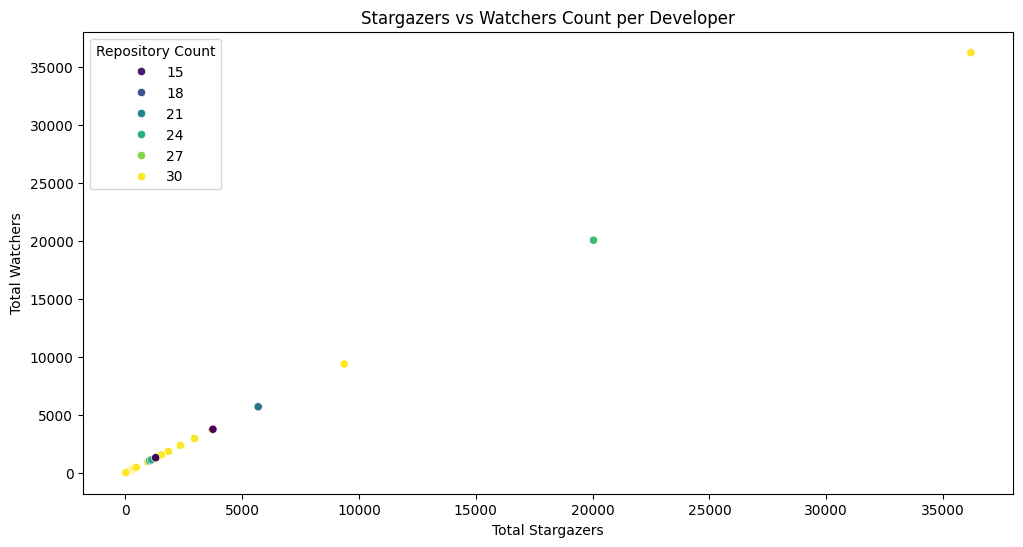

<ipython-input-2-bc77c98861e5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette='coolwarm')


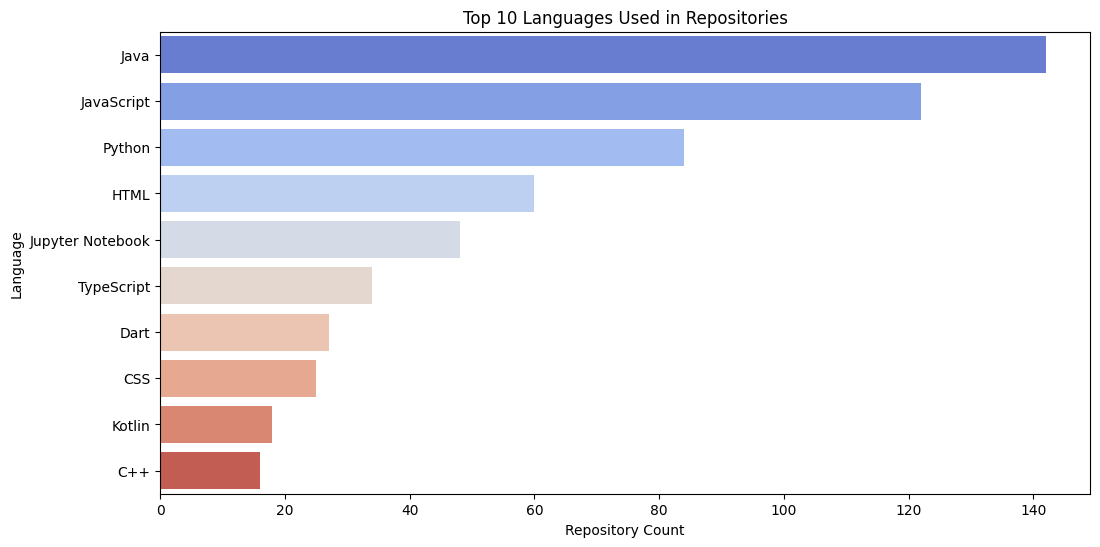

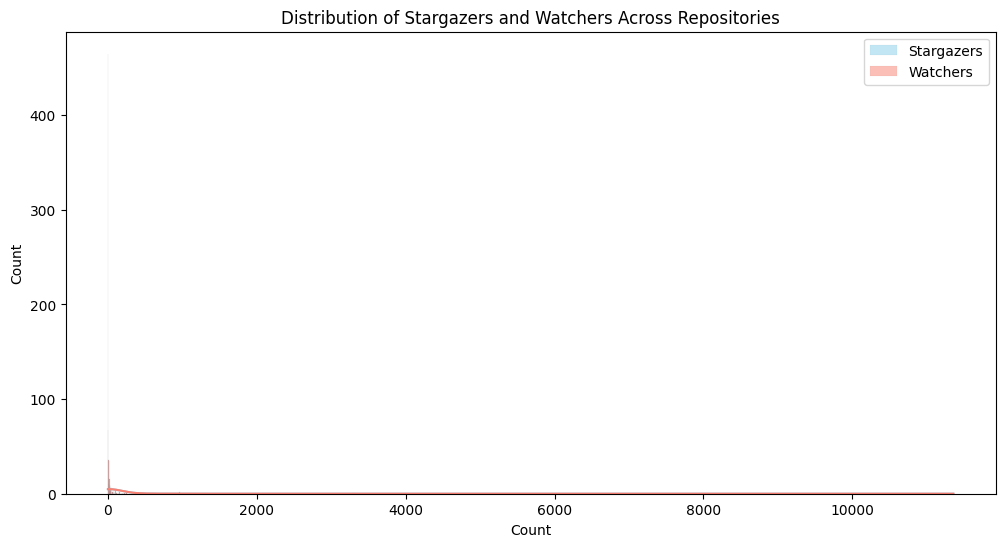

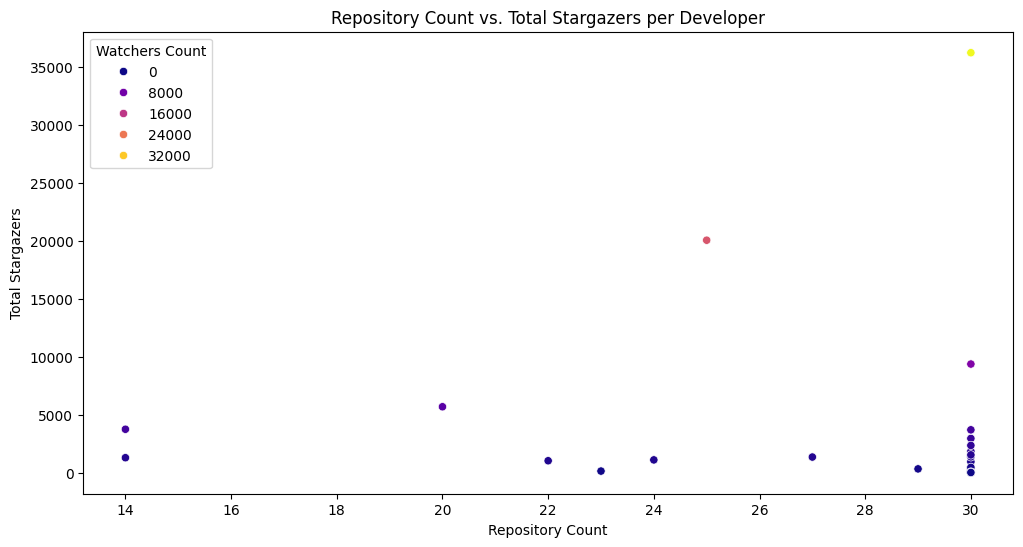

Insights:
1. Developers with few repositories might still have high stargazer counts, indicating high-quality contributions.
2. Popular languages vary, but top languages include Java and Kotlin, common in the dataset.
3. The distribution of stargazers and watchers shows that these metrics don't always correlate.
4. Repository count and stargazer count show that visibility can come from a few highly popular repositories.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/repositories.csv'  # Update path if needed in your environment
data = pd.read_csv(file_path)

# Inspect data and drop rows with missing values if necessary
data.dropna(subset=['stargazers_count', 'watchers_count'], inplace=True)

# Summarize stargazer and watcher counts by developer
developer_stats = data.groupby('login').agg({
    'stargazers_count': 'sum',
    'watchers_count': 'sum',
    'full_name': 'count'
}).rename(columns={'full_name': 'repo_count'}).reset_index()

# Analysis 1: Scatter plot of stargazers vs watchers by developer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='stargazers_count', y='watchers_count', data=developer_stats, hue='repo_count', palette='viridis')
plt.title("Stargazers vs Watchers Count per Developer")
plt.xlabel("Total Stargazers")
plt.ylabel("Total Watchers")
plt.legend(title='Repository Count')
plt.show()

# Analysis 2: Top languages used by developers
top_languages = data['language'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_languages.values, y=top_languages.index, palette='coolwarm')
plt.title("Top 10 Languages Used in Repositories")
plt.xlabel("Repository Count")
plt.ylabel("Language")
plt.show()

# Analysis 3: Distribution of repositories with high stargazers but low watchers and vice versa
plt.figure(figsize=(12, 6))
sns.histplot(data['stargazers_count'], kde=True, color='skyblue', label='Stargazers')
sns.histplot(data['watchers_count'], kde=True, color='salmon', label='Watchers')
plt.title("Distribution of Stargazers and Watchers Across Repositories")
plt.xlabel("Count")
plt.legend()
plt.show()

# Analysis 4: Relationship between the repository count and stargazers for each developer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='repo_count', y='stargazers_count', data=developer_stats, hue='watchers_count', palette='plasma')
plt.title("Repository Count vs. Total Stargazers per Developer")
plt.xlabel("Repository Count")
plt.ylabel("Total Stargazers")
plt.legend(title='Watchers Count')
plt.show()

# Interpretation
print("Insights:")
print("1. Developers with few repositories might still have high stargazer counts, indicating high-quality contributions.")
print("2. Popular languages vary, but top languages include Java and Kotlin, common in the dataset.")
print("3. The distribution of stargazers and watchers shows that these metrics don't always correlate.")
print("4. Repository count and stargazer count show that visibility can come from a few highly popular repositories.")

